In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer

warnings.filterwarnings(action='ignore') #경고문 안띄우는거

In [2]:
df = pd.read_csv("data/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df_raw = df.copy()

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# 필요없는 컬럼 제거

In [8]:
df.drop(['island','culmen_depth_mm','flipper_length_mm'],axis=1, inplace=True) # inplace= True -> 원본에 다시 덮어씌우라는 뜻
df.head()

,species,culmen_length_mm,body_mass_g,sex
0,Adelie,39.1,3750.0,MALE
1,Adelie,39.5,3800.0,FEMALE
2,Adelie,40.3,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN
4,Adelie,36.7,3450.0,FEMALE


In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [10]:
df['species'].unique()


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
df['culmen_length_mm'].unique()


array([39.1, 39.5, 40.3,  nan, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8,
       41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.7, 35.9, 38.2,
       38.8, 35.3, 40.6, 40.5, 37.9, 37.2, 40.9, 36.4, 42.2, 37.6, 39.8,
       36.5, 40.8, 36. , 44.1, 37. , 39.6, 37.5, 42.3, 40.1, 35. , 34.5,
       41.4, 39. , 35.7, 41.3, 41.6, 35.5, 41.8, 33.5, 39.7, 45.8, 42.8,
       36.2, 42.1, 42.9, 35.1, 37.3, 36.3, 36.9, 38.3, 34. , 38.1, 33.1,
       43.2, 41. , 45.6, 42.7, 40.2, 35.2, 41.5, 38.5, 43.1, 36.8, 35.6,
       32.1, 40.7, 46.5, 50. , 51.3, 45.4, 52.7, 45.2, 46.1, 46.6, 51.7,
       47. , 52. , 45.9, 50.5, 50.3, 58. , 46.4, 49.2, 42.4, 48.5, 50.6,
       46.7, 49.5, 52.8, 54.2, 51. , 49.7, 47.5, 47.6, 46.9, 53.5, 49. ,
       46.2, 50.9, 45.5, 50.8, 50.1, 51.5, 49.8, 48.1, 51.4, 45.7, 50.7,
       52.2, 49.3, 50.2, 51.9, 46.8, 55.8, 43.5, 49.6, 48.7, 43.3, 48.4,
       45.1, 46.3, 44.5, 47.8, 48.2, 47.3, 59.6, 49.1, 42.6, 44.4, 44. ,
       45.3, 43.6, 44.9, 45. , 43.8, 50.4, 54.3, 47

In [12]:
df['body_mass_g'].unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

In [13]:
df['sex'] = df['sex'].replace('.', 'N')
df['sex'] = df['sex'].fillna('N')
df['sex'].unique()

array(['MALE', 'FEMALE', 'N'], dtype=object)

In [14]:
from sklearn.impute import SimpleImputer
np.set_printoptions(suppress=True)#출력값 형태 변경

imputer = SimpleImputer(strategy='constant',fill_value='N')
df[['sex']] = imputer.fit_transform(df[['sex']])

df['sex'].unique()

array(['MALE', 'FEMALE', 'N'], dtype=object)

In [15]:
imputer = SimpleImputer(strategy='mean')
df[['culmen_length_mm']] = imputer.fit_transform(df[['culmen_length_mm']])

df['culmen_length_mm'].unique()

array([39.1       , 39.5       , 40.3       , 43.92192982, 36.7       ,
       39.3       , 38.9       , 39.2       , 34.1       , 42.        ,
       37.8       , 41.1       , 38.6       , 34.6       , 36.6       ,
       38.7       , 42.5       , 34.4       , 46.        , 37.7       ,
       35.9       , 38.2       , 38.8       , 35.3       , 40.6       ,
       40.5       , 37.9       , 37.2       , 40.9       , 36.4       ,
       42.2       , 37.6       , 39.8       , 36.5       , 40.8       ,
       36.        , 44.1       , 37.        , 39.6       , 37.5       ,
       42.3       , 40.1       , 35.        , 34.5       , 41.4       ,
       39.        , 35.7       , 41.3       , 41.6       , 35.5       ,
       41.8       , 33.5       , 39.7       , 45.8       , 42.8       ,
       36.2       , 42.1       , 42.9       , 35.1       , 37.3       ,
       36.3       , 36.9       , 38.3       , 34.        , 38.1       ,
       33.1       , 43.2       , 41.        , 45.6       , 42.7 

In [16]:
imputer = SimpleImputer(strategy='mean')
df[['body_mass_g']] = imputer.fit_transform(df[['body_mass_g']])

df['body_mass_g'].unique()

array([3750.        , 3800.        , 3250.        , 4201.75438596,
       3450.        , 3650.        , 3625.        , 4675.        ,
       3475.        , 4250.        , 3300.        , 3700.        ,
       3200.        , 4400.        , 4500.        , 3325.        ,
       4200.        , 3400.        , 3600.        , 3950.        ,
       3550.        , 3150.        , 3900.        , 4150.        ,
       4650.        , 3100.        , 3000.        , 4600.        ,
       3425.        , 2975.        , 3500.        , 4300.        ,
       4050.        , 2900.        , 2850.        , 3350.        ,
       4100.        , 3050.        , 4450.        , 4000.        ,
       4700.        , 4350.        , 3725.        , 4725.        ,
       3075.        , 2925.        , 3175.        , 4775.        ,
       3825.        , 4275.        , 4075.        , 3775.        ,
       3875.        , 3275.        , 4475.        , 3975.        ,
       3525.        , 3575.        , 4550.        , 3850.     

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   species           344 non-null    object 
 1   culmen_length_mm  344 non-null    float64
 2   body_mass_g       344 non-null    float64
 3   sex               344 non-null    object 
dtypes: float64(2), object(2)
memory usage: 10.9+ KB


In [18]:
df.dtypes

species              object
culmen_length_mm    float64
body_mass_g         float64
sex                  object
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

features = ["species", "sex"]

for feature in features:
    le = LabelEncoder()
    print(feature)
    le_result = le.fit(df[feature])
    df[feature] = le_result.transform(df[feature])

df.head()

species
sex


,species,culmen_length_mm,body_mass_g,sex
0,0,39.10000,3750.000000,1
1,0,39.50000,3800.000000,0
2,0,40.30000,3250.000000,0
3,0,43.92193,4201.754386,2
4,0,36.70000,3450.000000,0


# 이상치 제거

In [20]:
df.describe()

,species,culmen_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000
mean,0.918605,43.921930,4201.754386,0.552326
std,0.893320,5.443643,799.613058,0.558680
min,0.000000,32.100000,2700.000000,0.000000
25%,0.000000,39.275000,3550.000000,0.000000
50%,1.000000,44.250000,4050.000000,1.000000
75%,2.000000,48.500000,4750.000000,1.000000
max,2.000000,59.600000,6300.000000,2.000000


In [21]:
# import matplotlib.pyplot as plt



# plt.figure(figsize=(6,4))
# sns.boxplot(data=df[['MedInc', 'AveRooms', 'target']])
# plt.show()

## Barplot

<Axes: xlabel='sex', ylabel='culmen_length_mm'>

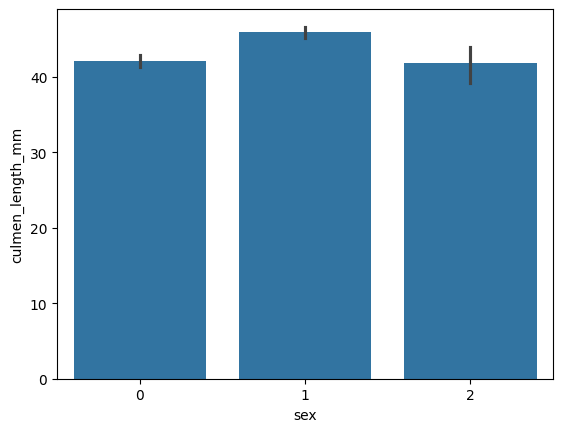

In [22]:
sns.barplot(x='sex', y='culmen_length_mm',data=df)

<Axes: xlabel='sex', ylabel='body_mass_g'>

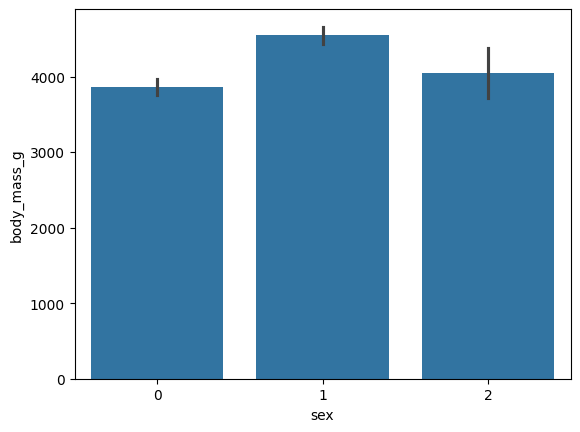

In [23]:
sns.barplot(x='sex', y='body_mass_g',data=df)

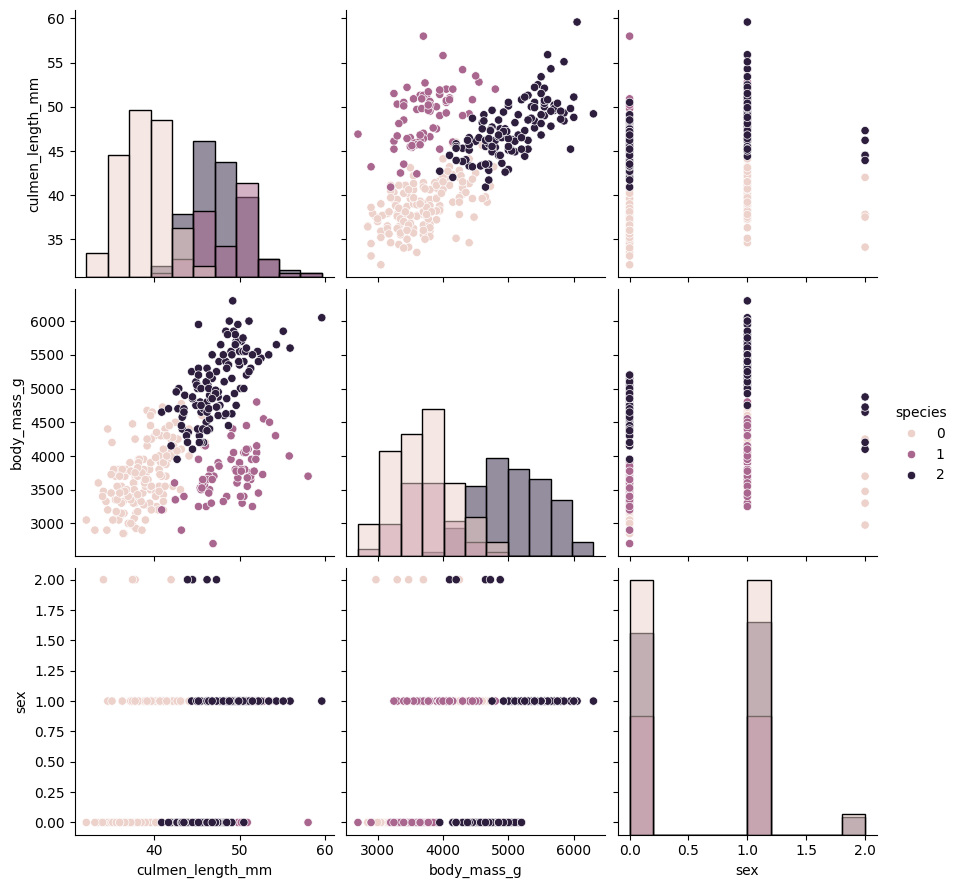

In [24]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

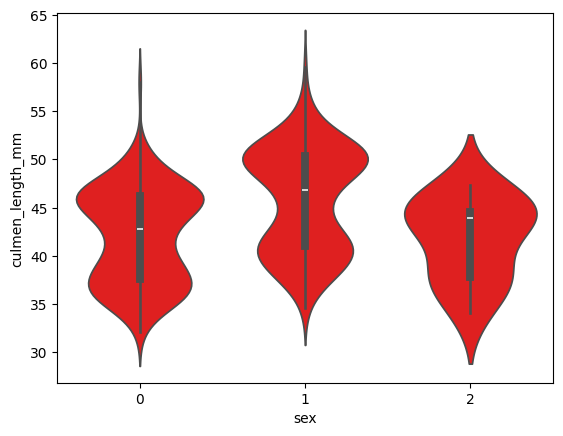

In [28]:
ax = sns.violinplot(x="sex", y="culmen_length_mm", data=df,color='red')

In [30]:
def remove_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean

In [31]:
print("Before : ", df.shape)

Before :  (344, 4)


In [33]:
df_cleaned = remove_iqr(df, df.columns)
print('After : ', df_cleaned.shape)

df_cleaned

After :  (344, 4)


,species,culmen_length_mm,body_mass_g,sex
0,0,39.10000,3750.000000,1
1,0,39.50000,3800.000000,0
2,0,40.30000,3250.000000,0
3,0,43.92193,4201.754386,2
4,0,36.70000,3450.000000,0
...,...,...,...,...
339,2,43.92193,4201.754386,2
340,2,46.80000,4850.000000,0
341,2,50.40000,5750.000000,1
342,2,45.20000,5200.000000,0


In [34]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

y_data = df['sex']
X_data = df.drop('sex',axis=1) #정답값을 빼고 줘야함.

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42,stratify=y_data)

In [35]:
X_data

,species,culmen_length_mm,body_mass_g
0,0,39.10000,3750.000000
1,0,39.50000,3800.000000
2,0,40.30000,3250.000000
3,0,43.92193,4201.754386
4,0,36.70000,3450.000000
...,...,...,...
339,2,43.92193,4201.754386
340,2,46.80000,4850.000000
341,2,50.40000,5750.000000
342,2,45.20000,5200.000000


## 스케일링

In [42]:
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler()

df_std = pd.DataFrame(std_scaler.fit_transform(df_cleaned),columns=df_cleaned.columns)
df_std

,species,culmen_length_mm,body_mass_g,sex
0,-1.029802,-8.870812e-01,-0.565789,0.802475
1,-1.029802,-8.134940e-01,-0.503168,-0.990067
2,-1.029802,-6.663195e-01,-1.192003,-0.990067
3,-1.029802,-1.307172e-15,0.000000,2.595017
4,-1.029802,-1.328605e+00,-0.941517,-0.990067
...,...,...,...,...
339,1.212299,-1.307172e-15,0.000000,2.595017
340,1.212299,5.294731e-01,0.811880,-0.990067
341,1.212299,1.191758e+00,1.939064,0.802475
342,1.212299,2.351241e-01,1.250229,-0.990067


## 데이터 양이 적은 경우

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold(n_splits=5)
model = RandomForestClassifier()


score = cross_val_score(model,X_data,y_data,cv=cv)
score

array([0.85507246, 0.8115942 , 0.82608696, 0.84057971, 0.85294118])

## 모델 성능 비교

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
X_test

,species,culmen_length_mm,body_mass_g
180,1,46.4,3700.0
237,2,49.2,6300.0
263,2,49.6,4750.0
261,2,49.6,5700.0
132,0,36.8,3500.0
...,...,...,...
32,0,39.5,3300.0
207,1,52.2,3450.0
220,2,46.1,4500.0
197,1,50.8,4450.0


In [38]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

dt_model.fit(X_train,y_train)
dt_result = dt_model.predict(X_test)
accuracy_score(dt_result,y_test)

0.8405797101449275

In [39]:
rf_model.fit(X_train,y_train)
rf_result = rf_model.predict(X_test)
accuracy_score(rf_result,y_test)

0.8405797101449275

In [40]:
lr_model.fit(X_train,y_train)
lr_result = lr_model.predict(X_test)
accuracy_score(lr_result,y_test)

0.8115942028985508